<a href="https://colab.research.google.com/github/kal-ops/Kalvin-Richard-Profile/blob/main/Machine_Learning_Pattern_Recognition_Stock_Trading_algorithm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import matplotlib
import pandas as pd

In [2]:
data = pd.read_csv('ASIANPAINT_min2023.csv')

In [3]:
#we dont have bid/Ask so lets go with high/low per minute
High = list(data["high"])
Low = list(data["low"])
data

,date,open,high,low,close,volume,yyyymmdd,HHMM,date_time
0,2023-01-02 09:15:00+05:30,3087.90,3087.90,3055.00,3066.85,10515,20230102,915,20230102_0915
1,2023-01-02 09:16:00+05:30,3066.85,3073.45,3061.00,3063.95,5422,20230102,916,20230102_0916
2,2023-01-02 09:17:00+05:30,3060.00,3065.50,3058.00,3060.10,12176,20230102,917,20230102_0917
3,2023-01-02 09:18:00+05:30,3059.75,3063.55,3054.60,3059.95,9096,20230102,918,20230102_0918
4,2023-01-02 09:19:00+05:30,3060.00,3061.50,3051.85,3051.85,10073,20230102,919,20230102_0919
...,...,...,...,...,...,...,...,...,...
91925,2023-12-29 15:25:00+05:30,3403.75,3404.40,3402.45,3403.55,4219,20231229,1525,20231229_1525
91926,2023-12-29 15:26:00+05:30,3404.50,3405.00,3400.05,3403.65,4305,20231229,1526,20231229_1526
91927,2023-12-29 15:27:00+05:30,3403.65,3405.00,3402.10,3404.70,4546,20231229,1527,20231229_1527
91928,2023-12-29 15:28:00+05:30,3404.70,3404.70,3395.00,3398.10,1511,20231229,1528,20231229_1528


In [4]:
#formatting the date
data['date'] = pd.to_datetime(data['date']).dt.tz_localize(None)
data

,date,open,high,low,close,volume,yyyymmdd,HHMM,date_time
0,2023-01-02 09:15:00,3087.90,3087.90,3055.00,3066.85,10515,20230102,915,20230102_0915
1,2023-01-02 09:16:00,3066.85,3073.45,3061.00,3063.95,5422,20230102,916,20230102_0916
2,2023-01-02 09:17:00,3060.00,3065.50,3058.00,3060.10,12176,20230102,917,20230102_0917
3,2023-01-02 09:18:00,3059.75,3063.55,3054.60,3059.95,9096,20230102,918,20230102_0918
4,2023-01-02 09:19:00,3060.00,3061.50,3051.85,3051.85,10073,20230102,919,20230102_0919
...,...,...,...,...,...,...,...,...,...
91925,2023-12-29 15:25:00,3403.75,3404.40,3402.45,3403.55,4219,20231229,1525,20231229_1525
91926,2023-12-29 15:26:00,3404.50,3405.00,3400.05,3403.65,4305,20231229,1526,20231229_1526
91927,2023-12-29 15:27:00,3403.65,3405.00,3402.10,3404.70,4546,20231229,1527,20231229_1527
91928,2023-12-29 15:28:00,3404.70,3404.70,3395.00,3398.10,1511,20231229,1528,20231229_1528


In [5]:
import numpy as np

In [6]:
#making a separate date list
Date = data['date']
Date

,date
0,2023-01-02 09:15:00
1,2023-01-02 09:16:00
2,2023-01-02 09:17:00
3,2023-01-02 09:18:00
4,2023-01-02 09:19:00
...,...
91925,2023-12-29 15:25:00
91926,2023-12-29 15:26:00
91927,2023-12-29 15:27:00
91928,2023-12-29 15:28:00


In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

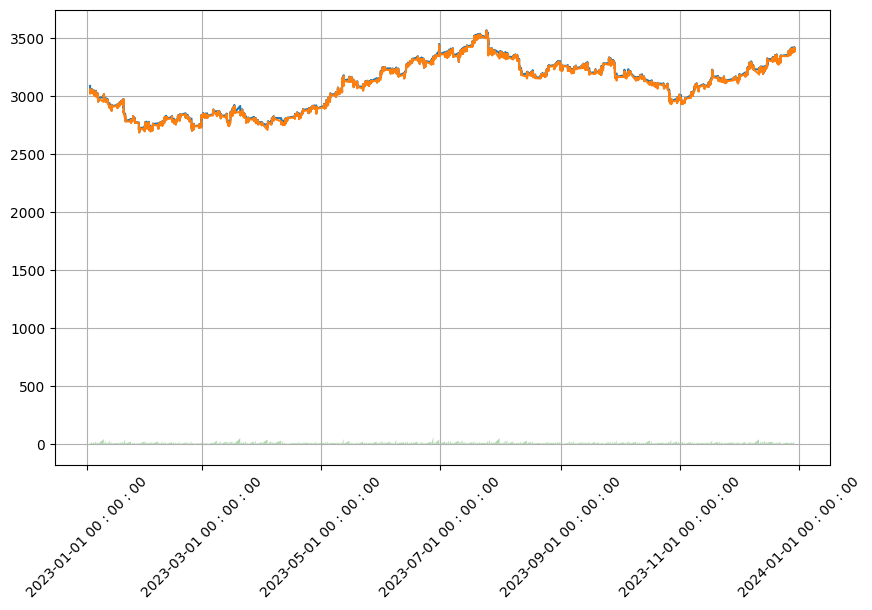

In [9]:
#Here we are just plotting the data to check what is going on
fig = plt.figure(figsize = (10,7))
axl = plt.subplot2grid((40,40), (0,0), rowspan = 40, colspan = 40)

axl.plot(Date, High)
axl.plot(Date, Low)

axl.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H : %M : %S'))

for labels in axl.xaxis.get_ticklabels():
  labels.set_rotation(45)

HighN = np.array(High)
LowN = np.array(Low)

ax2 = axl.twinx
axl.fill_between(Date, 0, (HighN - LowN), facecolor = 'g', alpha = 0.3 )

plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.subplots_adjust(bottom = 0.23)

plt.grid(True)
plt.show()

In [10]:
#creating a pct_change fuction manually:
def pct_change(start, current):
  if abs(float(start)) == 0:
    return 0.00000000000001
  else:
    return ((float(current)-float(start))/abs(float(start))*100)

In [11]:
from functools import reduce
import time

In [12]:
#Making our storage centers for pattern and outcome
patternar = []
performacear = []

In [13]:
#find the time at the starting (we will subtract this from endtime to get time taken)
patstarttime = time.time()
#finding the average of high and low per minute
avgLine = ((HighN+LowN)/2)
#length of the array
x = len(avgLine)-60

#creating a counter
y = 31

#while the counter is less than length of the array,
while y < x:
#Now let us make a list to store the values below. We are making a 2 dimensional array so we need to make an array here and
#append it to another array above

  pattern = []

#each of the 10 numbers before y and y
  for i in range(29, -1, -1):
    pattern.append(pct_change(avgLine[y-30], avgLine[y-i]))

#here, our outcome range is the ten numbers after y+10, so y+20 to y+30
  outcomerange = avgLine[y+20:y+30]
#currentpoint is y
  currentpoint = float(avgLine[y])

  try:
#finding the average value of the ten values in the outcomerange since picking an individual value is stupid
    avgoutcome = reduce( lambda x,y: x+y, outcomerange) /len(outcomerange)
  except Exception as e:
    print(str(e))
    avgoutcome = 0

  futureoutcome = pct_change(currentpoint, avgoutcome)

#Now appending pattern to patternar to make a 2D array
  patternar.append(pattern)
  performacear.append(futureoutcome)

#Increasing y value
  y += 1
  endtime = time.time()

print(len(patternar))
print(len(performacear))

print("Time taken was", endtime - patstarttime)

91839
91839
Time taken was 4.039463520050049


In [14]:
#now we are going to make a list that recognizes similar patterns from the past in the most recent data and stores them
#if they have similar results

#making the list
patforrec = []

#creating (current pattern = cp) cp1, cp2... from avgLine[-1]... to find the most recent pattterns again using pct_change

for i in range(30, 0, -1):
  patforrec.append(pct_change(avgLine[-31], avgLine[-i]))

patforrec

[0.05597413405804035,
 0.12152279104708455,
 0.1266783033945286,
 0.15613837395139757,
 0.18707144803611536,
 0.20253798507847426,
 0.21211250800945133,
 0.2091665009537671,
 0.1944364656753326,
 0.2091665009537671,
 0.2106395044816025,
 0.2091665009537671,
 0.22684254328788578,
 0.28281667734593957,
 0.30343872673574246,
 0.32700678318124304,
 0.3122767479028085,
 0.2909181967490812,
 0.27103264912318925,
 0.28797218969338356,
 0.28208017558201515,
 0.2702961473592649,
 0.254829610316906,
 0.24230908033024467,
 0.25409310855299494,
 0.26514063501182084,
 0.23862657151063607,
 0.26882314383142947,
 0.1598208827710062,
 0.0316695758486288]

pattern for rec  [0.05597413405804035, 0.12152279104708455, 0.1266783033945286, 0.15613837395139757, 0.18707144803611536, 0.20253798507847426, 0.21211250800945133, 0.2091665009537671, 0.1944364656753326, 0.2091665009537671, 0.2106395044816025, 0.2091665009537671, 0.22684254328788578, 0.28281667734593957, 0.30343872673574246, 0.32700678318124304, 0.3122767479028085, 0.2909181967490812, 0.27103264912318925, 0.28797218969338356, 0.28208017558201515, 0.2702961473592649, 0.254829610316906, 0.24230908033024467, 0.25409310855299494, 0.26514063501182084, 0.23862657151063607, 0.26882314383142947, 0.1598208827710062, 0.0316695758486288]
previous pattern [0.05556423746764092, 0.12936049035439248, 0.15366984424648739, 0.1501970794047618, 0.12849229914395716, 0.18058377176988827, 0.20662950808285385, 0.20662950808285385, 0.20923408171414407, 0.20315674324112828, 0.21444322897674037, 0.22833428834365846, 0.22138875866020732, 0.24656630376273755, 0.2882394818634919, 0.2856349082321701, 0.276084804917

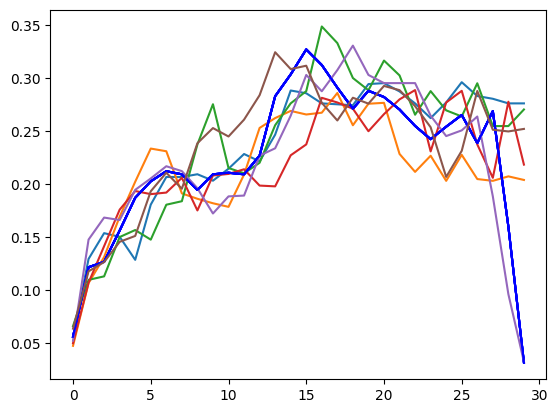

In [17]:
#let us compare pattern for rec and our actual observed patterns

for eachpat in patternar:
  sim = []
  for i in range(29, -1, -1):
    sim.append(100 - abs(pct_change(eachpat[i], patforrec[i])))

#finding the average similarity
  howsim = (sum(sim))/30.00

#keeping a threshold of 85% similarity and printing all similar patterns and their outcomes
  if howsim > 85:

    patdex = patternar.index(eachpat)

    print("pattern for rec ", patforrec)

    print("previous pattern", eachpat)

    print("outcome is ", performacear[patdex])

#buy if the stock goes up
    if performacear[patdex] > 0:
      print("buy")
#sell if the stock goes down
    else:
      print("sell")

    xp = list(np.arange(30))

    plt.plot(xp, patforrec, color = 'blue')
    plt.plot(xp, eachpat)
    plt.show


In [ ]:
#as we can see, the algorithm is able to find previous patterns that resemble our current pattern and also find the outcome
#Now, for my next step I will have to forward test the algorithm with 2024 data